42
515.0
25
430.0
43
520.0
42
515.0
37
490.0
33
470.0
13
370.0
21
410.0
9
350.0
32
465.0


NameError: name 'stop' is not defined

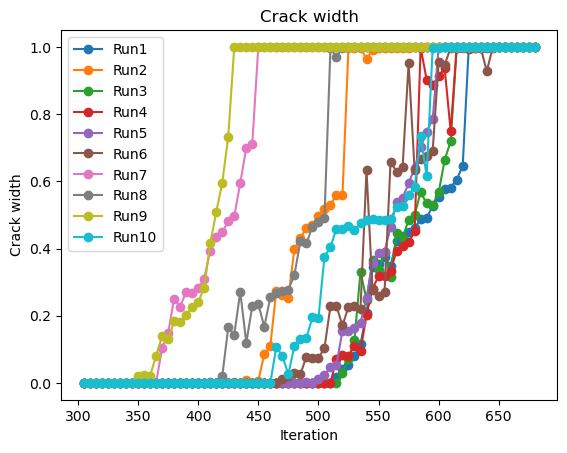

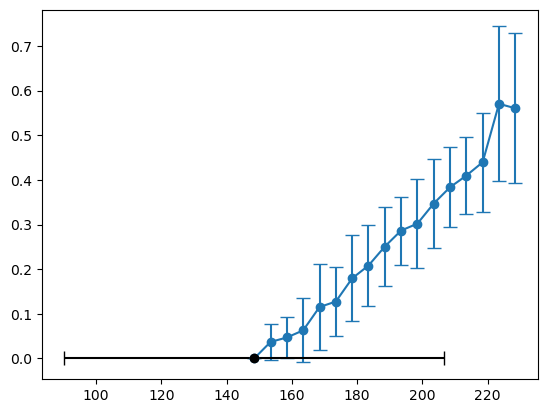

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import param as p
# Define folder names
run_folders = [f"Run{i}" for i in  [1,2,3,4,5,6,7,8,9,10]]##[1,6,7]]##[1,2,6,7,9,10]]##[1,7]]##[1,2,6,7,9,10]]##[1,2,3,4,5,6,7,8,9,10]]##

plt.figure()
plt.title('Crack width')
# Define the file name
file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []
start_ite_list=[]

ite_arr_init=np.arange(0,1000,5)#np.arange((p.lam_max-1)/(p.e_rate*p.del_t),1000,5)##np.append(np.array(0),np.arange((p.lam_step-1)/(p.e_rate*p.del_t),600,10))
len_data=17##35
# Get current directory
current_dir = os.getcwd()
crack_width_arr=[]

len_data_after_crack_start=len_data#30
data_after_crack_start=[]
##ite_after_crack_start=np.arange(0,600,10)
# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder, file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data=data[1:,:] ## remove the initial zero
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                crack_width_arr.append(data[0:len_data,1])
                start_ite=np.where(data[:,1]>0)[0][0]
                print(start_ite)
                print(data[start_ite,0])
                ##print(data)
                start_ite_list.append(start_ite)
                data_after_crack_start.append(data[start_ite-1:len_data_after_crack_start+start_ite-1,1])
                #print(data)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Crack width')

'''
ite_arr=data[0:len_data,0]
crack_width_arr=np.array(crack_width_arr)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
plt.errorbar(ite_arr,mean_crack_width, yerr=std_crack_width,fmt='-o', capsize=5)
plt.errorbar(np.mean(ite_arr_init[start_ite_list]),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)
'''

##ite_arr=data[0:len_data,0]
crack_width_arr=np.array(data_after_crack_start)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
x=np.mean(ite_arr_init[start_ite_list])+ite_arr_init[0:len_data_after_crack_start]-0*(p.lam_max-1)/(p.e_rate*p.del_t)
y=mean_crack_width
yerr=std_crack_width
plt.errorbar(x,y, yerr=yerr,fmt='-o', capsize=5)
data = np.column_stack((x, y, yerr))
plt.errorbar(np.mean(ite_arr_init[start_ite_list])-0*(p.lam_max-1)/(p.e_rate*p.del_t),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)

np.savetxt('avg_crack_width.txt',data)
np.savetxt('avg_crack_start.txt',np.array([np.mean(ite_arr_init[start_ite_list]),np.std(ite_arr_init[start_ite_list])]))
stop
file_name = "gini_coeff.txt"

plt.figure()
plt.title('Gini_coeff chain length')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')


plt.figure()
plt.title('Gini_coeff force')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,2],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini force')

stop

file_name = "mean_end_to_end_distance_normtxt"

plt.figure()
plt.title('Mean end to end distance')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')

stop
# Compute the average if data is collected
if data_list:
    # Stack and average data
    stacked_data = np.vstack(data_list)
    average_data = np.mean(stacked_data, axis=0)
    print("Average data:")
    print(average_data)
else:
    print("No data to average.")


42
515.0
25
430.0
43
520.0
42
515.0
37
490.0
33
470.0
13
370.0
21
410.0
32
465.0


NameError: name 'stop' is not defined

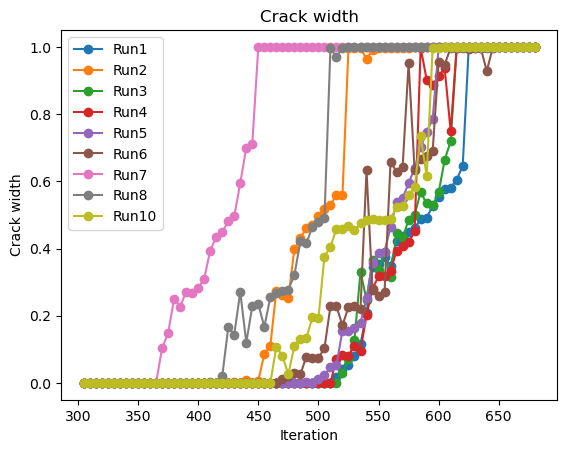

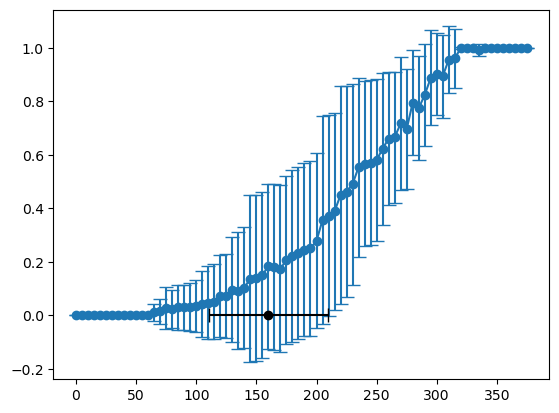

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
import param as p
# Define folder names
run_folders = [f"Run{i}" for i in  [1,2,3,4,5,6,7,8,10]]##[1,6,7]]##[1,2,6,7,9,10]]##[1,7]]##[1,2,6,7,9,10]]##[1,2,3,4,5,6,7,8,9,10]]##

plt.figure()
plt.title('Crack width')
# Define the file name
file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []
start_ite_list=[]

ite_arr_init=np.arange(0,1000,5)#np.arange((p.lam_max-1)/(p.e_rate*p.del_t),1000,5)##np.append(np.array(0),np.arange((p.lam_step-1)/(p.e_rate*p.del_t),600,10))
len_data=103##35
# Get current directory
current_dir = os.getcwd()
crack_width_arr=[]

len_data_after_crack_start=len_data#30
data_after_crack_start=[]
##ite_after_crack_start=np.arange(0,600,10)
# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder, file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data=data[1:,:] ## remove the initial zero
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                crack_width_arr.append(data[0:len_data,1])
                start_ite=np.where(data[:,1]>0)[0][0]
                print(start_ite)
                print(data[start_ite,0])
                ##print(data)
                start_ite_list.append(start_ite)
                data_after_crack_start.append(data[0:len_data_after_crack_start,1])
                #data_after_crack_start.append(data[start_ite-1:len_data_after_crack_start+start_ite-1,1])
                #print(data)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Crack width')

'''
ite_arr=data[0:len_data,0]
crack_width_arr=np.array(crack_width_arr)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
plt.errorbar(ite_arr,mean_crack_width, yerr=std_crack_width,fmt='-o', capsize=5)
plt.errorbar(np.mean(ite_arr_init[start_ite_list]),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)
'''

##ite_arr=data[0:len_data,0]
crack_width_arr=np.array(data_after_crack_start)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
x=ite_arr_init[0:len(mean_crack_width)]-0*(p.lam_max-1)/(p.e_rate*p.del_t)#np.mean(ite_arr_init[start_ite_list])+ite_arr_init[0:len_data_after_crack_start]-0*(p.lam_max-1)/(p.e_rate*p.del_t)
y=mean_crack_width
yerr=std_crack_width
plt.errorbar(x,y, yerr=yerr,fmt='-o', capsize=5)
data = np.column_stack((x, y, yerr))
plt.errorbar(np.mean(ite_arr_init[start_ite_list])-0*(p.lam_max-1)/(p.e_rate*p.del_t),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)

np.savetxt('avg_crack_width_new.txt',data)
np.savetxt('avg_crack_start_new.txt',np.array([np.mean(ite_arr_init[start_ite_list]),np.std(ite_arr_init[start_ite_list])]))
stop
file_name = "gini_coeff.txt"

plt.figure()
plt.title('Gini_coeff chain length')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')


plt.figure()
plt.title('Gini_coeff force')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,2],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini force')

stop

file_name = "mean_end_to_end_distance_normtxt"

plt.figure()
plt.title('Mean end to end distance')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')

stop
# Compute the average if data is collected
if data_list:
    # Stack and average data
    stacked_data = np.vstack(data_list)
    average_data = np.mean(stacked_data, axis=0)
    print("Average data:")
    print(average_data)
else:
    print("No data to average.")


In [24]:
start_ite_list

[94, 97, 95, 102, 97, 95, 103, 91]

In [22]:
ite_arr_init[start_ite_list]

array([870., 885., 875., 910., 885., 875., 915., 855.])

In [21]:
x

array([483.75, 488.75, 493.75, 498.75, 503.75, 508.75, 513.75, 518.75,
       523.75, 528.75, 533.75])

In [ ]:
import os
print(os.getcwd())

In [26]:
(ite_arr_init)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

In [15]:
start_ite_list

[26, 20]

In [19]:
np.shape(data)

(30, 3)

In [31]:
ite_arr_init[start_ite_list]

array([260, 330, 200])

In [32]:
data

array([[2.63333333e+02, 0.00000000e+00, 0.00000000e+00],
       [2.73333333e+02, 1.68412861e-02, 7.91284640e-03],
       [2.83333333e+02, 7.68804540e-02, 5.49720135e-02],
       [2.93333333e+02, 1.23797124e-01, 3.00534377e-02],
       [3.03333333e+02, 1.25006325e-01, 3.33899278e-02],
       [3.13333333e+02, 2.15731317e-01, 1.09681531e-01],
       [3.23333333e+02, 3.08448513e-01, 3.06603608e-02],
       [3.33333333e+02, 3.61575242e-01, 5.14301732e-02],
       [3.43333333e+02, 3.88504113e-01, 2.21252933e-02],
       [3.53333333e+02, 4.07349584e-01, 6.13132691e-02]])

In [40]:
(p.lam_step)/(p.e_rate*p.del_t)

400.0

In [43]:
ite_arr_init

array([300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.,
       410., 420., 430., 440., 450., 460., 470., 480., 490., 500., 510.,
       520., 530., 540., 550., 560., 570., 580., 590.])

In [44]:
start_ite_list

[25, 32, 19]

In [4]:
start_ite_list

[94, 95, 102, 97, 95, 103, 91]

In [19]:
ite_arr_init[0:len_data_after_crack_start]

array([400., 405., 410., 415., 420., 425., 430., 435., 440., 445., 450.])

In [20]:
x

array([483.75, 488.75, 493.75, 498.75, 503.75, 508.75, 513.75, 518.75,
       523.75, 528.75, 533.75])